# Python Libraries 1

_June 24, 2020_ 

Agenda today:
- Introduction to Numpy: array math
- Introduction to Pandas: importing, indexing, and basic querying

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part I. Numpy
The basic data structure that exist in numpy is called numpy arrays. NP arrays are very similar to python lists. The __difference__ between a python list and a Numpy array is that list can only a mix of data types but array can only contain the same data type.

But what is the benefits of using NumPy array instead of the base python lists?
- Speed 
- Broadcasting Property

In [63]:
names_list=['Bob','John','Sally']
names_array=np.char.array(['Bob','John','Sally']) #use numpy.array for numbers and numpy.char.array for strings
print(names_list)
print(names_array)

['Bob', 'John', 'Sally']
['Bob' 'John' 'Sally']


In [64]:
import time

size_of_seq = 100000

def pure_python_version():
    tic = time.time()
    X = range(size_of_seq)
    Y = range(size_of_seq)
    Z = [X[i] + Y[i] for i in range(len(X)) ]
    toc = time.time()
    return toc - tic

def numpy_version():
    tic = time.time()
    X = np.arange(size_of_seq)
    Y = np.arange(size_of_seq)
    Z = X + Y 
    toc = time.time()
    return toc - tic


t1 = pure_python_version()
t2 = numpy_version()
print("python: " + str(t1), "numpy: "+ str(t2))
print("Numpy is in this example " + str(t1/t2) + " times faster!")

python: 0.033679962158203125 numpy: 0.00404810905456543
Numpy is in this example 8.319924612756935 times faster!


In [65]:
## broadcasting and array math

np.array([2,3,4,6]) * 5

array([10, 15, 20, 30])

In [66]:
# what would happen here?

li = [2,3,4,6]
li * 5

[2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6]

In [67]:
# numpy arrays can only contain one datatype 

li_2 = ['annie','5',12]
print(li_2)

['annie', '5', 12]


In [68]:
arr_2 = np.array(['annie',12])
print(arr_2)

['annie' '12']


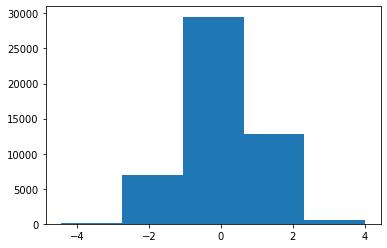

In [69]:
## simulation with numpy - in normal distribution 
norm = np.random.normal(0, size = 50000);
plt.hist(norm, bins = 5);

In [70]:
np.var(norm)

1.0093980846794093

In [71]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*,...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or seque

There are many other wonderous things numpy can do, you will encounter them later in the course of the program. 

## Part II. Pandas
Pandas stand for paneled data, and it is the most popular library for data scientists to manipulate, clean, and organize dataset in Python. The most fundamental data structure that exists in Pandas is called **DataFrames**. 

In [72]:
## importing data and look at optional parameters
df = pd.read_csv('auto-mpg.csv')

In [73]:
# examine first few elements of data 
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [74]:
# examine the last few elements
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [75]:
# randomly examine a few elements
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
378,38.0,4,105.0,63,2125,14.7,82,1,plymouth horizon miser
311,32.1,4,98.0,70,2120,15.5,80,1,chevrolet chevette
163,18.0,6,225.0,95,3785,19.0,75,1,plymouth fury
28,9.0,8,304.0,193,4732,18.5,70,1,hi 1200d
83,28.0,4,98.0,80,2164,15.0,72,1,dodge colt (sw)


In [76]:
# examine the information in this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [77]:
# check out the data types 

# attribute vs methods
# method
df.
#

SyntaxError: invalid syntax (<ipython-input-77-182311d16814>, line 5)

In [78]:
# basic data structure in pandas : dataframe vs series
# dataframe = table of data
# series = single column of data

In [79]:
# indexing and subsetting 
# loc vs iloc

# just columns


In [80]:
# indexing using logic

# only want weight > 4000 
pd.set_option('display.max_row', 1000)

In [81]:
# we want weight > 4000 and year > 80

In [90]:
# checking for missing values & examine data integrity
df.isnull()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [ ]:
# introduce some missing values and remove them 



In [ ]:
# check again 



In [ ]:
# remove the miss values

In [ ]:
# but why do we still have anomaly in our data?


# try converting the datatype!

In [ ]:
# how should we get rid of the anomaly in this case?

In [ ]:
# exercise - get the cars that are heavier than 3000 but has a horsepower less than 150 

In [ ]:
# exercise - find top 10 heaviest cars' names